# package_LAB

In [9]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import sys
sys.path.append('../')  # Add parent directory to the Python path

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

import package_LAB

from importlib import reload
package_DBR = reload (package_DBR)
package_LAB = reload(package_LAB)

from package_LAB import *
from package_DBR import *


# PID_RT

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


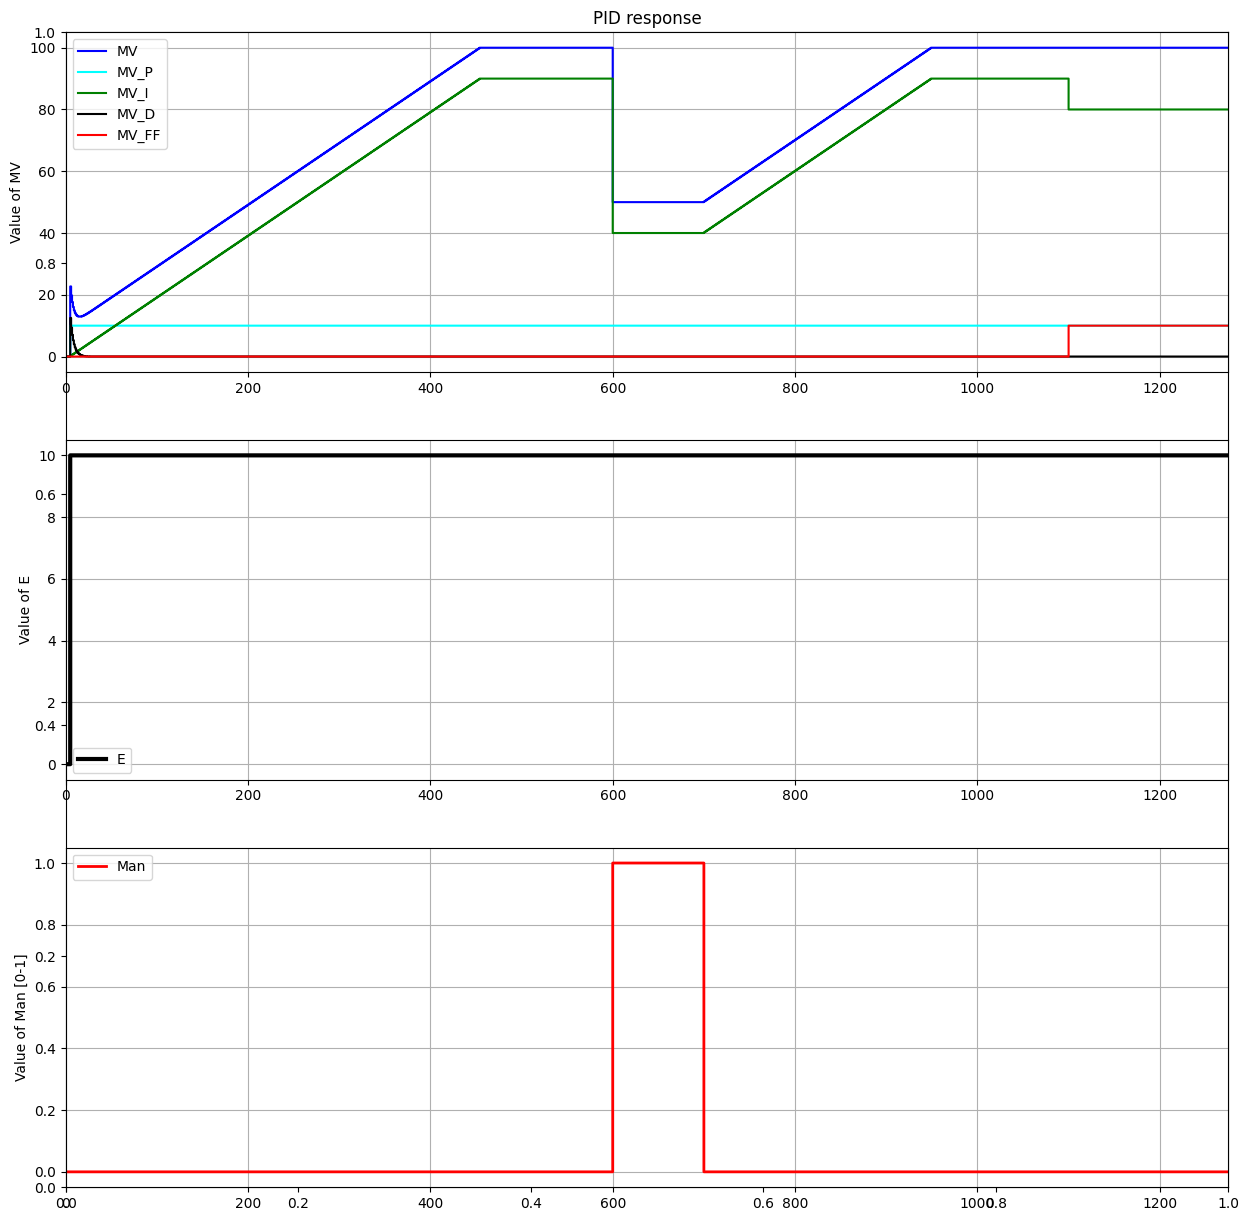

In [14]:
#-----init vectors------
t = []
tt= []
SP = []
MV = []
PV = []
DV =[]
Man = []
MVMan = []
MVFF = []
MVP = []
MVI = []
MVD = [] 
E  = []

#---------Variables------
MVmin = 0 
MVMax = 100
Kc = 1
Ti = 50
Td = 5
alpha = 0.6
Ts = 1   
# Ts =0.01
TSim = 1275
N = int(TSim/Ts) + 1


#--------Paths----------
ManPath = {0: False, 600: True, 700:False, TSim : False}
MVManPath = {0:50, TSim:50}
SPPath = {0: 50, 5: 60, TSim : 60}
PVPath = {0:50, 5:50, TSim:50}
MVFFPath = {0:0, 1100: 10}  #scalaire pas binaire



for i in range(0,N):
    t.append(i*Ts)
    tt.append(i*Ts)
    # tt.append(i*Ts)
    SelectPath_RT(SPPath, t,SP)
    SelectPath_RT(PVPath, t,PV)
    SelectPath_RT(ManPath, t,Man)
    SelectPath_RT(MVManPath, t,MVMan)
    SelectPath_RT(MVFFPath, t, MVFF)
    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVmin, MVMax, MV, MVP, MVI, MVD, E,False,0,"EBD-EBD")

plt.figure(figsize = (15,15))

#----------PID----------------
plt.title('PID response')
plt.subplot(3,1,1)
plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.step(t,MV,'blue',label='MV',where='post')
plt.step(t,MVP,'cyan',label='MV_P',where='post')
plt.step(t,MVI,'green',label='MV_I',where='post')
plt.step(t,MVD,'black',label='MV_D',where='post')
plt.step(t, MVFF,'red',label='MV_FF',where='post')
# plt.step(t,MV,'orange', linestyle=':',label='MV_Trap',where='post')
plt.xlim([0, TSim])
plt.legend()
plt.grid()

#---------E-------------
plt.subplot(3,1,2)
plt.step(t,E ,'black',linewidth=3,label='E',where='post')
plt.ylabel('Value of E')
plt.legend(loc='best')
plt.xlim([0, TSim])
plt.grid()

#---------MAN--------------
plt.subplot(3,1,3)
plt.step(t,Man,'red',linewidth=2,label='Man',where='post')
plt.ylabel('Value of Man [0-1]')
plt.legend(loc='upper left')
plt.xlim([0, TSim])
plt.grid()




# LL_RT()

In [11]:
help(LL_RT)

Help on function LL_RT in module package_LAB:

LL_RT(MV, Kp, TLead, TLag, Ts, PV, PVInit=0, method='EBD')
    The function "LL_RT" needs to be included in a "for or while loop".
    :param MV: input vector
    :param Kp: process gain
    :param T1: lead time constant (positive value) [s]
    :param T2: lag time constant (positive value) [s]
    :param Ts: sampling period [s]
    :param PV: output vector
    :param PVInit: (optional: default value is 0)
    :param method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
    The function "LL_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that considers
    both lead and lag time constants.



(0.0, 80.0)

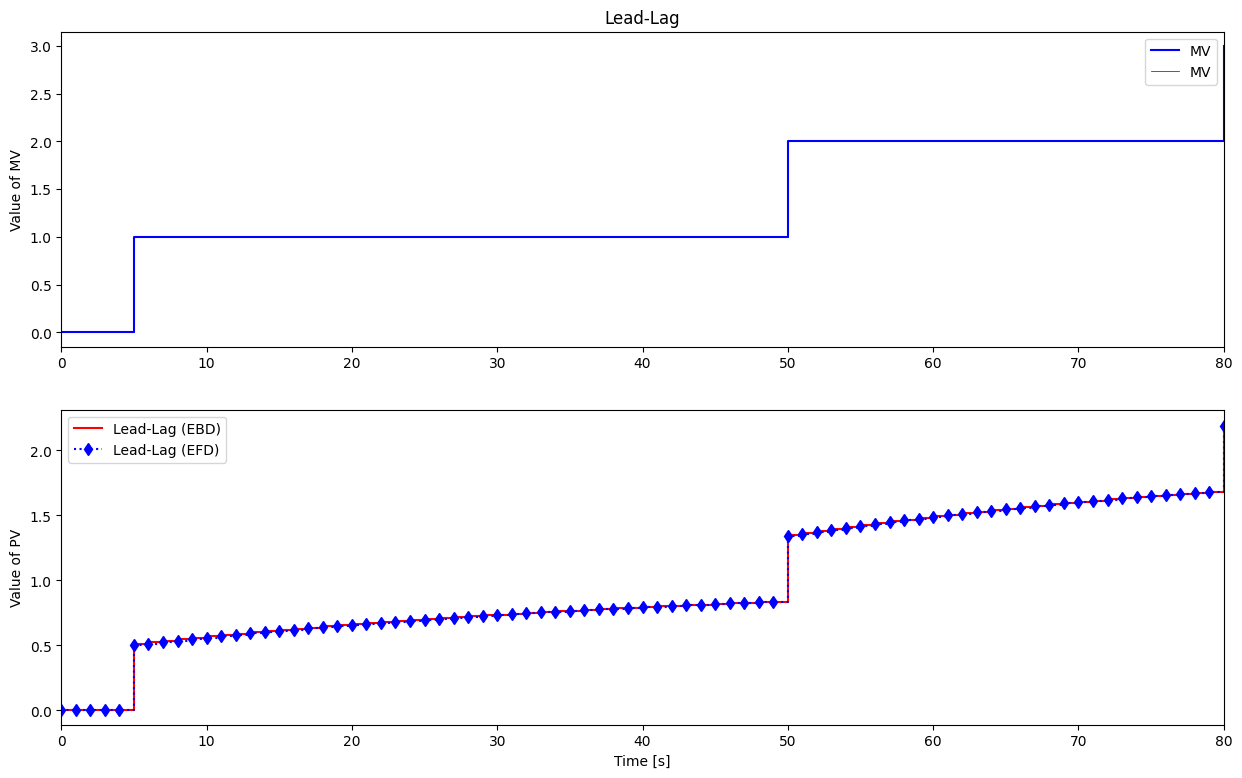

In [12]:
TSim = 80
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []
PV = []

# Parameters
Kp = 1
TLead = 20
TLag = 40
theta = 10


for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    # Delay_RT(MV,theta,Ts,MVDelay)
    LL_RT(MV, Kp, TLead, TLag, Ts, PV_EBD)
    LL_RT(MV, Kp, TLead, TLag, Ts, PV_EFD, 0, 'EFD')
    LL_RT(MV, Kp, TLead, TLag, Ts, PV_TRAP, 0, 'TRAP')
    
plt.figure(figsize = (15,9))

#---------MV-----------------
plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MV,'b-',linewidth=0.5,label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Lead-Lag')
plt.legend(loc='best')
plt.xlim([0, TSim])
plt.grid()


#---------LL------------------------
plt.subplot(2,1,2)
plt.step(t,PV_EBD,'-r',label='Lead-Lag (EBD)',where='post')
plt.step(t,PV_EFD,'d:b',label='Lead-Lag (EFD)',where='post')
# plt.step(t,PV_TRAP,'springgreen',label='Lead-Lag (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])   
plt.grid() 

# plt.show()



# IMC Margins